In [171]:
import pandas as pd
import prisma_ml as prisma
import numpy as np
from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler,
    QuantileTransformer,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.metrics import classification_report, roc_auc_score
import mlflow
import mlflow.sklearn
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import time

In [172]:
df = pd.read_csv(r"../../data/processed/emotet_static.csv")

## EDA

In [173]:
info = prisma.DatasetInformation(df)

df.drop_duplicates(inplace=True)

info.dataframe_summary()

### Shape:

(79646, 31)

### Columns and Metadata:

,Data Type,Null Values,Percentage of Nulls
Duration,float64,0,0.0
Source Port,int64,0,0.0
Destination Port,int64,0,0.0
Protocol,object,0,0.0
Flags,object,0,0.0
Packets,int64,0,0.0
Bytes,int64,0,0.0
Mean Payload Size,float64,0,0.0
Std Payload Size,float64,0,0.0
Min Payload Size,int64,0,0.0


### Duplicated Rows:

,Duplicated Rows Count
Total,0


### Categorical

In [174]:
info = prisma.DatasetInformation(df)

info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,Protocol,4,TCP,76.17%
1,Flags,14,SYN,51.50%
2,Label,2,Benign,53.87%
3,Direction,1,outbound,100.00%


### Column: Protocol

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TCP,60663,76.165784
1,HTTP,14216,17.848982
2,DATA-TEXT-LINES,4743,5.955101
3,XML,24,0.030133


---

### Column: Flags

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,SYN,41015,51.496623
1,"PSH,ACK",18926,23.762650
2,"FIN,SYN,ACK",9294,11.669136
3,"SYN,RST,ACK",6277,7.881124
4,"FIN,SYN,RST,ACK",2958,3.713934
5,"FIN,SYN,PSH,ACK",556,0.698089
6,"SYN,ACK",289,0.362856
7,"FIN,SYN,RST,PSH,ACK",119,0.149411
8,"SYN,RST",64,0.080356
9,"SYN,PSH,ACK",53,0.066544


---

### Column: Label

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Benign,42907,53.872134
1,Emotet,36739,46.127866


---

### Column: Direction

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,outbound,79646,100.000000


---

### Numerical

### Numerical Columns Statistical Summary:

,Duration,Source Port,Destination Port,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,...,Bytes per Second,Destination Common Port Usage,Flags Count,SYN Count,ACK Count,FIN Count,Is HTTP,Is Internal IP,Short Duration,Single Packet
Mean,9.324158e+04,4.496912e+04,1.975860e+04,2.972742,2.635330e+02,134.157834,-2.534073e+04,131.289770,138.798333,2.485293,...,1.002438e+08,0.004733,1.774929,0.761633,0.484218,0.163034,0.178490,0.756786,0.256661,0.252216
Median,8.999834e+00,5.385850e+04,8.080000e+03,3.000000,1.340000e+02,44.666667,1.885618e+00,42.000000,46.000000,3.064484,...,1.488923e+01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Mode,1.000000e-06,8.080000e+03,8.080000e+03,3.000000,1.340000e+02,44.666667,1.885618e+00,42.000000,46.000000,3.126317,...,4.590000e+08,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Std Dev,3.967281e+05,2.154821e+04,2.080712e+04,3.517117,3.863043e+03,185.353203,7.303837e+04,185.455531,187.851449,1.456676,...,1.992481e+08,0.068637,0.923228,0.426088,0.499754,0.369399,0.382927,0.429026,0.436793,0.434287
Variance,1.573932e+11,4.643253e+08,4.329361e+08,12.370115,1.492310e+07,34355.810036,5.334603e+09,34393.753951,35288.166750,2.121906,...,3.969980e+16,0.004711,0.852350,0.181551,0.249754,0.136456,0.146633,0.184063,0.190788,0.188605
Range,3.037289e+06,6.545400e+04,6.545200e+04,397.000000,4.833180e+05,1344.000000,3.672119e+05,1344.000000,1420.000000,36.649846,...,1.378000e+09,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Min,1.000000e-06,8.000000e+01,8.000000e+01,1.000000,3.400000e+01,34.000000,-3.665050e+05,34.000000,34.000000,-8.328277,...,6.415428e-05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,3.037289e+06,6.553400e+04,6.553200e+04,398.000000,4.833520e+05,1378.000000,7.068421e+02,1378.000000,1454.000000,28.321570,...,1.378000e+09,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix:

,Duration,Source Port,Destination Port,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,...,Bytes per Second,Destination Common Port Usage,Flags Count,SYN Count,ACK Count,FIN Count,Is HTTP,Is Internal IP,Short Duration,Single Packet
Duration,1.000000,0.036653,-0.077452,0.215739,0.012089,-0.071163,0.080735,-0.072656,-0.070718,0.174771,...,-0.118246,-0.016193,-0.011028,0.072993,-0.045076,0.001553,-0.046784,0.074730,-0.138104,-0.136495
Source Port,0.036653,1.000000,-0.971710,0.075407,-0.029279,-0.253931,0.157185,-0.249426,-0.263457,-0.050421,...,-0.265343,0.022826,-0.545653,0.342082,-0.590323,-0.509741,-0.108905,0.977849,-0.319009,-0.309316
Destination Port,-0.077452,-0.971710,1.000000,-0.091387,0.025075,0.246053,-0.172083,0.243445,0.251099,0.034553,...,0.260756,-0.065223,0.528083,-0.338600,0.579336,0.496990,0.114600,-0.991465,0.313433,0.307774
Packets,0.215739,0.075407,-0.091387,1.000000,0.870579,-0.207522,0.194659,-0.278331,-0.181466,-0.125094,...,-0.282196,0.046876,0.136161,0.310378,-0.043251,0.151319,-0.257776,0.089774,-0.321056,-0.325750
Bytes,0.012089,-0.029279,0.025075,0.870579,1.000000,0.109222,-0.021598,0.031563,0.122994,0.018467,...,0.030312,0.002883,0.043943,-0.024473,0.033164,0.014032,0.013967,-0.024885,0.020117,0.020133
Mean Payload Size,-0.071163,-0.253931,0.246053,-0.207522,0.109222,1.000000,-0.693783,0.993060,0.985390,0.320469,...,0.982910,-0.019743,0.114115,-0.876914,0.498060,-0.223277,0.591397,-0.248176,0.816636,0.824975
Std Payload Size,0.080735,0.157185,-0.172083,0.194659,-0.021598,-0.693783,1.000000,-0.698791,-0.675941,-0.223369,...,-0.704287,0.024012,-0.083817,0.618709,-0.356768,0.153185,-0.471041,0.166757,-0.590102,-0.597067
Min Payload Size,-0.072656,-0.249426,0.243445,-0.278331,0.031563,0.993060,-0.698791,1.000000,0.967360,0.326027,...,0.990148,-0.036075,0.103728,-0.884631,0.496191,-0.230722,0.598174,-0.245688,0.823381,0.833501
Max Payload Size,-0.070718,-0.263457,0.251099,-0.181466,0.122994,0.985390,-0.675941,0.967360,1.000000,0.295866,...,0.957410,0.046191,0.152245,-0.851879,0.509850,-0.192469,0.572122,-0.255586,0.797308,0.799657
Mean Entropy,0.174771,-0.050421,0.034553,-0.125094,0.018467,0.320469,-0.223369,0.326027,0.295866,1.000000,...,0.326070,-0.085029,-0.169326,-0.364373,0.021890,-0.199139,0.310639,-0.038238,0.364280,0.370161


### Correlation Matrix Heatmap:

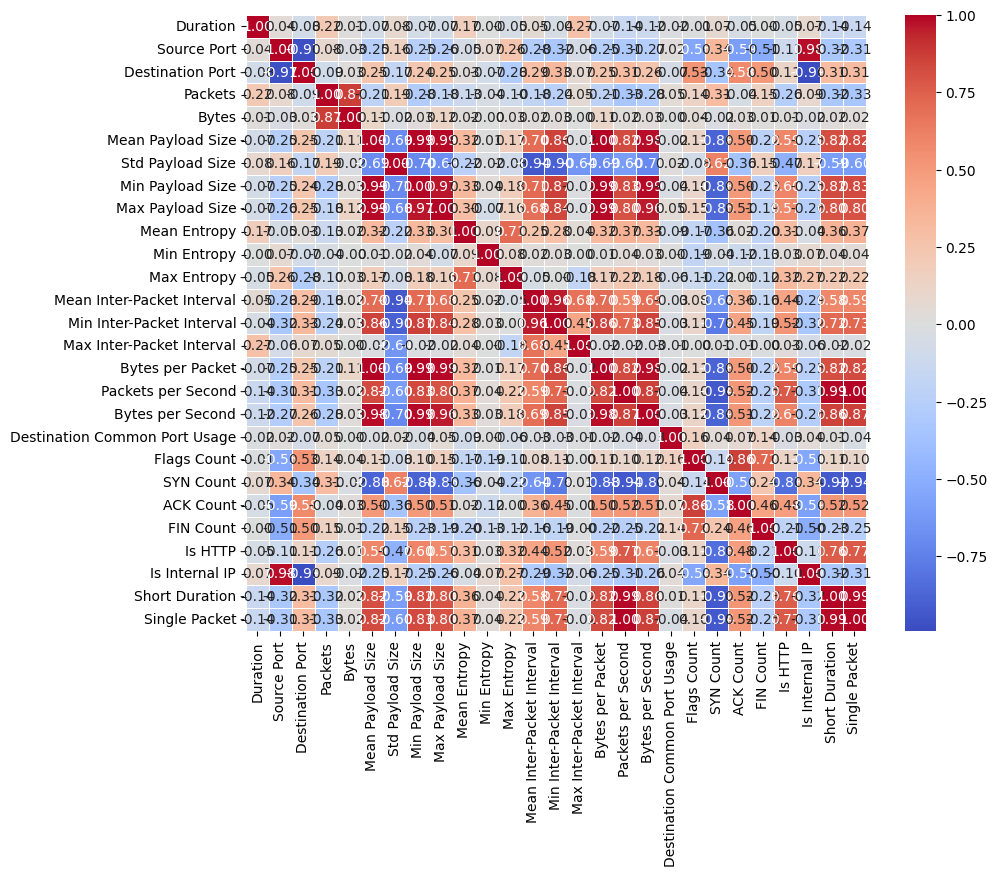

In [175]:
info.numerical_summary()

## Modeling

### Final Data Prep

In [176]:
def save_as_pickle(path, variable):
    with open(path, "wb") as file:
        pickle.dump(variable, file)

#### Encoding

In [177]:
encoder = LabelEncoder()

columns_to_encode = ["Protocol", "Flags", "Label", "Direction"]

for column in columns_to_encode:
    path = "../../variables/emotet/static_no_pca" + column + "_Encoder.pkl"
    df[column] = encoder.fit_transform(df[column])
    save_as_pickle(path, encoder)

In [178]:
label_column = df["Label"]
dropped_df = df.drop("Label", axis=1)

scaler = StandardScaler()
scaled_dropped_df = scaler.fit_transform(dropped_df.to_numpy())
print(dropped_df.columns)

df = pd.DataFrame(scaled_dropped_df, columns=dropped_df.columns)

# Reattach the 'Status' column
df["Label"] = label_column

df.dropna(inplace=True)
df.reset_index()

Index(['Duration', 'Source Port', 'Destination Port', 'Protocol', 'Flags',
       'Packets', 'Bytes', 'Mean Payload Size', 'Std Payload Size',
       'Min Payload Size', 'Max Payload Size', 'Mean Entropy', 'Min Entropy',
       'Max Entropy', 'Mean Inter-Packet Interval',
       'Min Inter-Packet Interval', 'Max Inter-Packet Interval',
       'Bytes per Packet', 'Packets per Second', 'Bytes per Second',
       'Destination Common Port Usage', 'Flags Count', 'SYN Count',
       'ACK Count', 'FIN Count', 'Is HTTP', 'Is Internal IP', 'Direction',
       'Short Duration', 'Single Packet'],
      dtype='object')


,index,Duration,Source Port,Destination Port,Protocol,Flags,Packets,Bytes,Mean Payload Size,Std Payload Size,...,Flags Count,SYN Count,ACK Count,FIN Count,Is HTTP,Is Internal IP,Direction,Short Duration,Single Packet,Label
0,0,-0.235028,0.194350,-0.945769,0.518607,-1.994489,0.292076,-0.029907,-0.524180,0.347024,...,1.326952,0.559436,1.032079,2.265765,-0.466123,0.566901,0.0,1.701821,-0.580762,0.0
1,1,-0.235028,-2.083208,1.412910,0.518607,-1.994489,0.292076,-0.031978,-0.534970,0.346977,...,1.326952,0.559436,1.032079,2.265765,-0.466123,-1.763976,0.0,1.701821,-0.580762,0.0
2,2,-0.235028,0.194350,-0.945769,-1.225838,-0.384668,-0.560901,-0.034308,-0.017037,0.347314,...,0.243789,-1.787514,1.032079,-0.441352,2.145358,0.566901,0.0,1.701821,1.721875,0.0
3,3,-0.235028,-2.083208,1.412910,-2.970283,-0.384668,-0.560901,-0.013081,0.425364,0.347339,...,0.243789,-1.787514,1.032079,-0.441352,-0.466123,-1.763976,0.0,1.701821,1.721875,0.0
4,4,-0.235005,0.194397,-0.561283,0.518607,0.420242,0.007750,-0.033532,-0.482817,0.346979,...,-0.839375,0.559436,-0.968918,-0.441352,-0.466123,0.566901,0.0,-0.587606,-0.580762,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79620,79641,-0.235005,0.445278,-0.561283,0.518607,0.420242,0.007750,-0.033532,-0.482817,0.346979,...,-0.839375,0.559436,-0.968918,-0.441352,-0.466123,0.566901,0.0,-0.587606,-0.580762,1.0
79621,79642,-0.234987,0.445324,-0.561283,0.518607,0.822697,0.292076,-0.029907,-0.524180,0.347024,...,0.243789,0.559436,1.032079,-0.441352,-0.466123,0.566901,0.0,-0.587606,-0.580762,1.0
79622,79643,-0.234988,-1.711945,1.672823,0.518607,-1.994489,0.007750,-0.040780,-0.533172,0.346979,...,1.326952,0.559436,1.032079,2.265765,-0.466123,-1.763976,0.0,-0.587606,-0.580762,0.0
79623,79644,-0.235028,0.445324,-0.561283,-1.225838,-0.384668,-0.560901,0.049305,1.725593,-2.535088,...,0.243789,-1.787514,1.032079,-0.441352,2.145358,0.566901,0.0,1.701821,1.721875,1.0


In [179]:
df.dtypes

Duration                         float64
Source Port                      float64
Destination Port                 float64
Protocol                         float64
Flags                            float64
Packets                          float64
Bytes                            float64
Mean Payload Size                float64
Std Payload Size                 float64
Min Payload Size                 float64
Max Payload Size                 float64
Mean Entropy                     float64
Min Entropy                      float64
Max Entropy                      float64
Mean Inter-Packet Interval       float64
Min Inter-Packet Interval        float64
Max Inter-Packet Interval        float64
Bytes per Packet                 float64
Packets per Second               float64
Bytes per Second                 float64
Destination Common Port Usage    float64
Flags Count                      float64
SYN Count                        float64
ACK Count                        float64
FIN Count       

#### Type Casting

In [180]:
df["Bytes"] = df["Bytes"].astype("float64")
df["Duration"] = df["Duration"].astype("float64")
df["Packets"] = df["Packets"].astype("float64")
df["Flags Count"] = df["Flags Count"].astype("float64")

### Data Splitting

## Models

### Splitting

In [181]:
df_reset = df.reset_index(drop=True)
X = df_reset.drop("Label", axis=1)

y = df["Label"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Decision Tree

In [182]:
dt_model = DecisionTreeClassifier()

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 7, 81, 121],
}

# Perform Grid Search
grid_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2,
)

start_time = time.time()
grid_dt.fit(X_train, y_train)
end_time = time.time()
dt_time = start_time - end_time

# Best parameters
print("Best Parameters for Decision Tree:", grid_dt.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.4s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.4s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.4s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.4s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.4s
[CV] END .....................criterion=entropy, max_depth=3; total time=   0.2s
[CV] END .....................criterion=entropy, 

## XGB

In [31]:
xgb_model = XGBClassifier()

param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
}

grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2,
)
start_time = time.time()
grid_xgb.fit(X_train, y_train)
end_time = time.time()
xgb_time = start_time - end_time
# Best parameters
print("Best Parameters for XGBoost:", grid_xgb.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:38] WARNING: /workspace/src/lea

[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.2s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:40] WARNING: /workspace/src/lea

[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.7s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.8s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.0s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.1s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:41] WARNING: /workspace/src/lea

[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.8s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.7s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.8s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.7s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   3.6s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   3.7s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   3.7s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   2.0s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   3.8s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END .................learning_rate=0.2, n_estimators=50; total time=   1.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   2.2s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   4.2s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   1.3s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   1.0s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END .................learning_rate=0.2, n_estimators=50; total time=   1.4s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:43] WARNING: /workspace/src/lea

[CV] END ................learning_rate=0.1, n_estimators=200; total time=   2.7s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   2.6s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   1.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   2.9s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   2.9s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.5s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.5s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.5s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   3.1s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.7s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.4s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   1.8s
[CV] END ................lea

/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:41:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 100}


### Random Forest

In [32]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
}

grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2,
)
start_time = time.time()

grid_rf.fit(X_train, y_train)

end_time = time.time()

print("Best Parameters for Random Forest:", grid_rf.best_params_)

rf_time = start_time - end_time

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   3.3s
[CV] END ......................max_depth=10, n_estimators=50; total time=   3.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   3.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   3.6s
[CV] END ......................max_depth=10, n_estimators=50; total time=   3.6s
[CV] END ......................max_depth=20, n_estimators=50; total time=   4.0s
[CV] END .....................max_depth=10, n_estimators=100; total time=   6.7s
[CV] END .....................max_depth=10, n_estimators=100; total time=   6.9s
[CV] END .....................max_depth=10, n_estimators=100; total time=   7.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   7.2s
[CV] END ......................max_depth=20, n_estimators=50; total time=   4.1s
[CV] END ......................max_depth=20, n_es

### Logistic Regression

In [33]:
log_reg_model = LogisticRegression(random_state=42)

param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10],
}

grid_log_reg = GridSearchCV(
    estimator=log_reg_model,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2,
)

start_time = time.time()
grid_log_reg.fit(X_train, y_train)
end_time = time.time()


print("Best Parameters for Logistic Regression:", grid_log_reg.best_params_)
logreg_time = start_time - end_time

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .................................C=0.01, penalty=l2; total time=   3.8s
[CV] END .................................C=0.01, penalty=l2; total time=   4.5s
[CV] END .................................C=0.01, penalty=l2; total time=   4.7s
[CV] END .................................C=0.01, penalty=l2; total time=   4.7s
[CV] END .................................C=0.01, penalty=l2; total time=   4.8s
[CV] END .................................C=0.01, penalty=l1; total time=   7.7s
[CV] END ..................................C=0.1, penalty=l2; total time=   7.5s
[CV] END .................................C=0.01, penalty=l1; total time=   8.0s
[CV] END .................................C=0.01, penalty=l1; total time=   9.7s
[CV] END .................................C=0.01, penalty=l1; total time=  10.2s
[CV] END ..................................C=0.1, penalty=l2; total time=   6.6s
[CV] END .................................C=0.01,

/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................................C=10, penalty=l1; total time= 4.6min
[CV] END ...................................C=10, penalty=l1; total time= 4.5min


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................................C=10, penalty=l1; total time= 4.7min
[CV] END ...................................C=10, penalty=l1; total time= 4.6min
[CV] END ...................................C=10, penalty=l1; total time= 4.8min
Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}


### Model Evaluation

In [116]:
def evaluate_model(model, X_test, y_test, model_name):
    y_test_pred = model.predict(X_test)

    # Log metrics
    print(model.get_params())
    test_metrics = classification_report(y_test, y_test_pred, output_dict=True)
    roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Log with MLflow
    with mlflow.start_run(run_name=model_name):
        mlflow.log_params(model.get_params())

        mlflow.log_metric("Accuracy_Test", test_metrics["accuracy"])
        mlflow.log_metric("Precision_Test", test_metrics["1.0"]["precision"])
        mlflow.log_metric("Recall_Test", test_metrics["1.0"]["recall"])
        mlflow.log_metric("F1-Score_Test", test_metrics["1.0"]["f1-score"])
        mlflow.log_metric("ROC-AUC_Test", roc_auc_test)

        mlflow.sklearn.log_model(model, f"{model_name}_model", input_example="auto")

    print(f"Test Metrics for {model_name}:")
    print(classification_report(y_test, y_test_pred))
    print(f"ROC-AUC (Test): {roc_auc_test}\n")

In [183]:
mlflow.set_experiment("Standard Scaler")

evaluate_model(grid_dt.best_estimator_, X_test, y_test, "Decision Tree")
evaluate_model(grid_log_reg.best_estimator_, X_test, y_test, "Logistic Regression")
evaluate_model(grid_xgb.best_estimator_, X_test, y_test, "XGBoost")
evaluate_model(grid_rf.best_estimator_, X_test, y_test, "Random Forest")

/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
2025/01/28 11:39:56 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError("could not convert string to float: 'auto'"). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`.


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
2025/01/28 11:39:58 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": "auto"
}. Alternatively, you can avoid passing input example and pass model signature instead when logging the model. To ensure the input example is valid prior to serving, please try calling `mlflow.models.validate_serving_input` on the model uri and serving input example. A serving input example can be generated from model input example using `mlflow.models.convert_input_example_to_serving_input` function.
Got error: could not convert string to float: 'auto'


Test Metrics for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      8579
         1.0       0.88      0.92      0.90      7346

    accuracy                           0.91     15925
   macro avg       0.91      0.91      0.91     15925
weighted avg       0.91      0.91      0.91     15925

ROC-AUC (Test): 0.950466226246496



NameError: name 'grid_log_reg' is not defined

In [51]:
mlflow.end_run()

## Validation

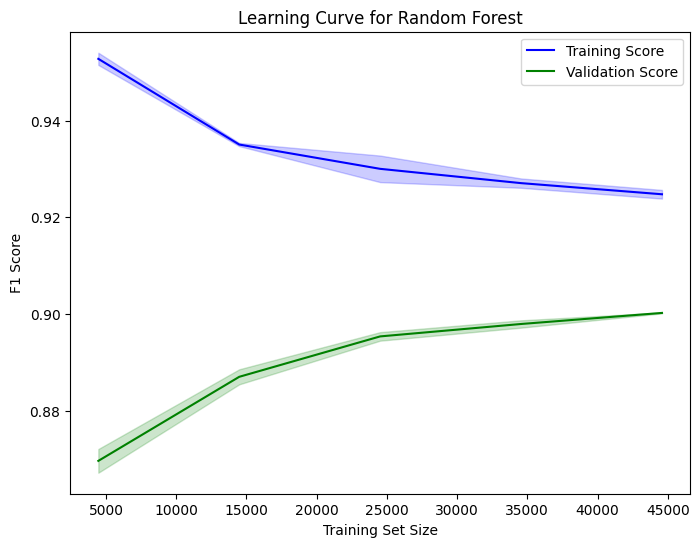

In [53]:
train_sizes, train_scores, val_scores = learning_curve(
    grid_log_reg.best_estimator_, X_train, y_train, cv=5, scoring="f1", n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)
plt.plot(train_sizes, val_mean, label="Validation Score", color="green")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2
)
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

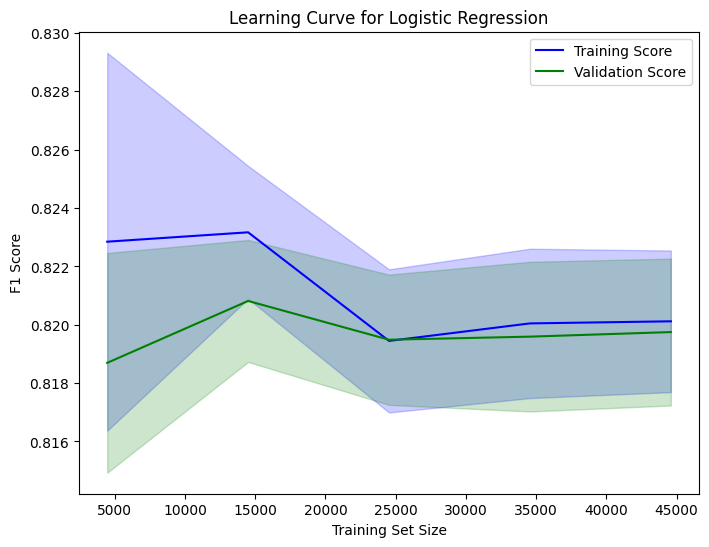

In [54]:
train_sizes, train_scores, val_scores = learning_curve(
    grid_dt.best_estimator_, X_train, y_train, cv=5, scoring="f1", n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)
plt.plot(train_sizes, val_mean, label="Validation Score", color="green")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2
)
plt.title("Learning Curve for Decision Tree")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:02:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:02:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:02:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:02:05] WARNING: /workspace/src/lea

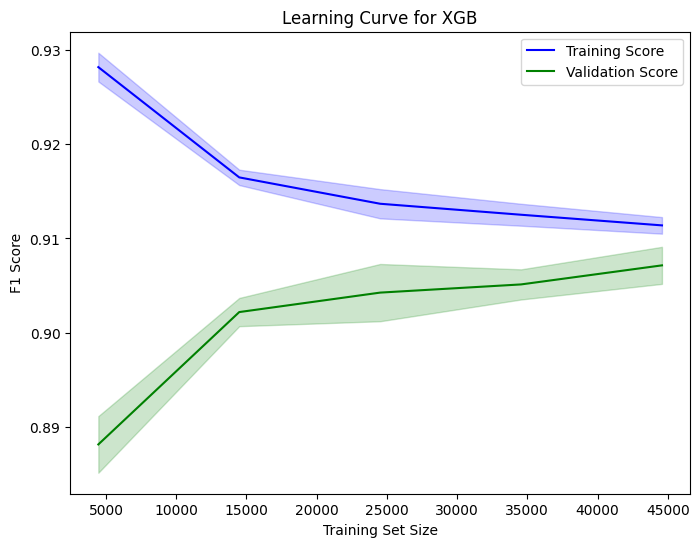

In [56]:
train_sizes, train_scores, val_scores = learning_curve(
    grid_xgb.best_estimator_, X_train, y_train, cv=5, scoring="f1", n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)
plt.plot(train_sizes, val_mean, label="Validation Score", color="green")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2
)
plt.title("Learning Curve for XGB")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    grid_rf.best_estimator_, X_train, y_train, cv=5, scoring="f1", n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)
plt.plot(train_sizes, val_mean, label="Validation Score", color="green")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2
)
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [ ]:
xbg_results = pd.DataFrame(log_reg_model.cv_results_)
columns_to_keep = [
    col
    for col in xbg_results.columns
    if col.startswith("param_") or col == "mean_test_score"
]
xbg_results = xbg_results[columns_to_keep]

In [ ]:
logreg_results = pd.DataFrame(log_reg_model.cv_results_)
columns_to_keep = [
    col
    for col in logreg_results.columns
    if col.startswith("param_") or col == "mean_test_score"
]
logreg_results = logreg_results[columns_to_keep]

In [ ]:
rf_results = pd.DataFrame(rf_model.cv_results_)
columns_to_keep = [
    col
    for col in rf_results.columns
    if col.startswith("param_") or col == "mean_test_score"
]
rf_results = rf_results[columns_to_keep]

In [ ]:
dt_results = pd.DataFrame(dt_model.cv_results_)
columns_to_keep = [
    col
    for col in dt_results.columns
    if col.startswith("param_") or col == "mean_test_score"
]
dt_results = dt_results[columns_to_keep]